In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_iris
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, log_loss

# Linear Regression
A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (intercept term).  
ŷ = θ0 + θ1x1 + θ2x2 + ⋯ + θnxn  
• ŷ is the predicted value.  
• n is the number of features.  
• xi is the ith feature value.  
• θj is the jth model parameter (including the bias term θ0 and the feature weights θ1, θ2, ⋯, θn).  

In [2]:
X = 3 * np.random.rand(200, 1)
y = 2 + 4 * X + np.random.rand(200, 1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 1), (40, 1), (160, 1), (40, 1))

In [4]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [5]:
y_pred_train_linear = linear_reg.predict(X_train)
y_pred_test_linear = linear_reg.predict(X_test)

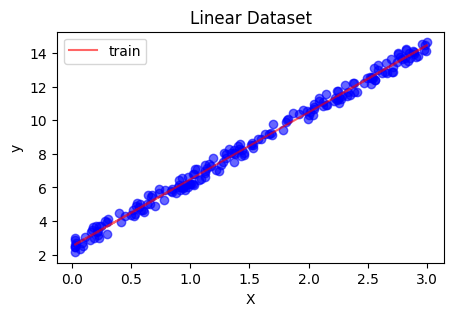

In [6]:
plt.figure(figsize=(5,3))
plt.scatter(X, y, color="b", alpha=0.6)
plt.plot(X_train, y_pred_train_linear, color="r", label="train", alpha=0.6)
plt.title("Linear Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc="best")
plt.show()

In [7]:
print(f"Intercept: {linear_reg.intercept_}")
print(f"Coefficient: {linear_reg.coef_}")

Intercept: [2.49904194]
Coefficient: [[3.98457843]]


In [8]:
print(f"Train accuracy: {linear_reg.score(X_train, y_train)}")
print(f"Test accuracy: {linear_reg.score(X_test, y_test)}")

Train accuracy: 0.9933197591617839
Test accuracy: 0.9955212364946254


# Stochastic Gradient Descent  
Picks a random instance from the training set at each step to compute gradients.   
Much faster because it manipulates very little data per iteration.  

In [9]:
sgd_reg = SGDRegressor(penalty=None, eta0=0.1) # default penalty='l2' ridge regularization, Here, we are not using ridge. eta0 is learning rate
sgd_reg.fit(X, y)

SGDRegressor(eta0=0.1, penalty=None)

In [10]:
y_pred_sgd = sgd_reg.predict(X_train)

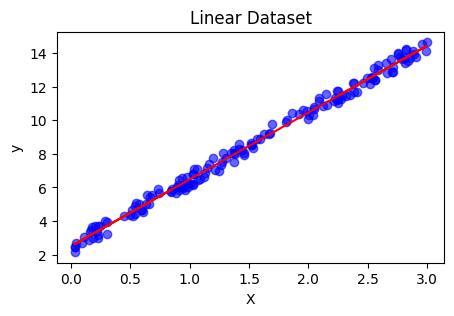

In [11]:
plt.figure(figsize=(5,3))
plt.scatter(X_train, y_train, color="b", alpha=0.6)
plt.plot(X_train, y_pred_sgd, color="r")
plt.title("Linear Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [12]:
print(f"Intercept: {sgd_reg.intercept_}")
print(f"Coefficient: {sgd_reg.coef_}")

Intercept: [2.51661446]
Coefficient: [3.96946038]


In [13]:
print(f"Train accuracy: {sgd_reg.score(X_train, y_train)}")
print(f"Test accuracy: {sgd_reg.score(X_test, y_test)}")

Train accuracy: 0.9933032545038836
Test accuracy: 0.99552441551749


# Polynomial Regression: Polynomial Feature Transformation  
Used to fit nonlinear data using a linear model by adding powers of each feature as new features.

In [14]:
y_degree3 = 0.5 * X**3 + 0.25 * X**2 + X + 2 + np.random.randn(200, 1)

In [15]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [16]:
X_poly_train, X_poly_test, y_degree3_train, y_degree3_test = train_test_split(X_poly, y_degree3, test_size=0.2, random_state=42)
X_poly_train.shape, X_poly_test.shape, y_degree3_train.shape, y_degree3_test.shape

((160, 3), (40, 3), (160, 1), (40, 1))

In [17]:
linear_reg_polyfeat = LinearRegression()
sgd_reg_polyfeat = SGDRegressor()

In [18]:
linear_reg_polyfeat.fit(X_poly_train, y_degree3_train)

LinearRegression()

In [19]:
sgd_reg_polyfeat.fit(X_poly_train, y_degree3_train)

SGDRegressor()

In [20]:
y_pred_poly_train_linear = linear_reg_polyfeat.predict(X_poly_train)
y_pred_poly_train_sgd = sgd_reg_polyfeat.predict(X_poly_train)
y_pred_poly_test_linear = linear_reg_polyfeat.predict(X_poly_test)
y_pred_poly_test_sgd = sgd_reg_polyfeat.predict(X_poly_test)

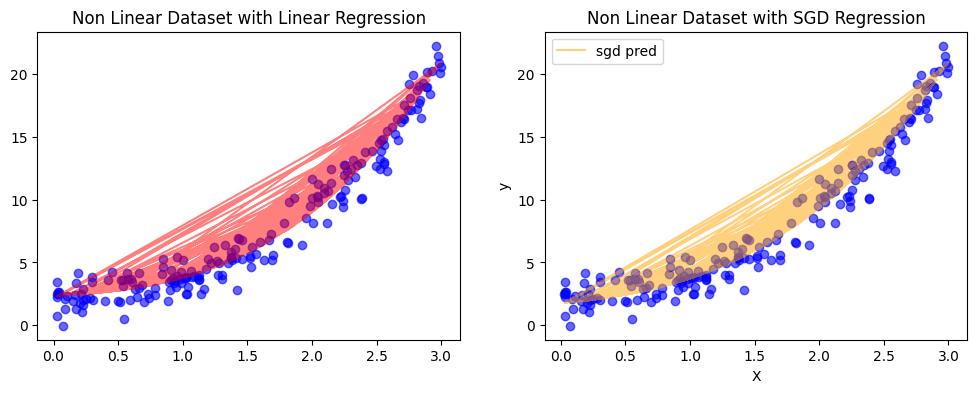

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax[0].scatter(X, y_degree3, color="b", alpha=0.6)
ax[0].plot(X_train, y_pred_poly_train_linear, color="red", label='linear pred', alpha=0.5)
ax[0].set_title("Non Linear Dataset with Linear Regression")

ax[1].scatter(X, y_degree3, color="b", alpha=0.6)
ax[1].plot(X_train, y_pred_poly_train_sgd, color="orange", label='sgd pred', alpha=0.5)
ax[1].set_title("Non Linear Dataset with SGD Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc='best')
plt.show()

In [22]:
print(f"Linear Regression Intercept: {linear_reg_polyfeat.intercept_}")
print(f"Linear Regression Coefficient: {linear_reg_polyfeat.coef_}")
print(f"SGD Regression Intercept: {sgd_reg_polyfeat.intercept_}")
print(f"SGD Regression Coefficient: {sgd_reg_polyfeat.coef_}")

Linear Regression Intercept: [2.31580371]
Linear Regression Coefficient: [[0.58897473 0.38792551 0.49448194]]
SGD Regression Intercept: [1.75816847]
SGD Regression Coefficient: [0.94895672 0.63564789 0.39111203]


In [23]:
print(f"Linear Regression Train accuracy: {linear_reg_polyfeat.score(X_poly_train, y_degree3_train)}")
print(f"Linear Regression Test accuracy: {linear_reg_polyfeat.score(X_poly_test, y_degree3_test)}")
print(f"SGD Regressor Train accuracy: {sgd_reg_polyfeat.score(X_poly_train, y_degree3_train)}")
print(f"SGD Regressor Test accuracy: {sgd_reg_polyfeat.score(X_poly_test, y_degree3_test)}")

Linear Regression Train accuracy: 0.9647584717815916
Linear Regression Test accuracy: 0.9718788593120747
SGD Regressor Train accuracy: 0.9624339036793103
SGD Regressor Test accuracy: 0.9726676360611585


# Learning Curves  
Plots of the model's performance on the training set and validation set as a function of training set size (or iteration).  
Useful for diagnosing underfitting and overfitting.  

In [24]:
def plot_learning_curves(model, X, y, title):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        val_errors.append(mean_squared_error(y_val, y_val_pred))
    plt.figure(figsize=(5,3))
    plt.plot(np.sqrt(train_errors), "r+", label="train errors")
    plt.plot(np.sqrt(val_errors), "b-", label="val errors")
    plt.title(title)
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend(loc='best')
    plt.show()

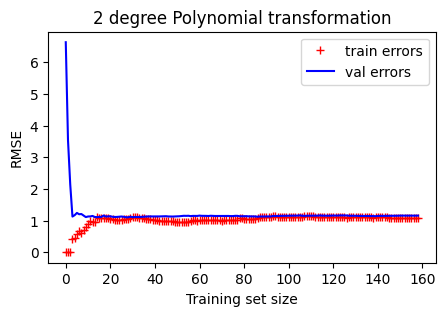

In [25]:
poly_2_reg = Pipeline([
        ("poly_2_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("linear_reg", LinearRegression())
])

plot_learning_curves(poly_2_reg, X, y_degree3, "2 degree Polynomial transformation")

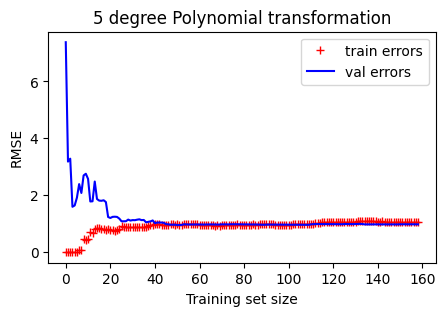

In [26]:
poly_5_reg = Pipeline([
        ("poly_5_features", PolynomialFeatures(degree=5, include_bias=False)),
        ("linear_reg", LinearRegression())
])
plot_learning_curves(poly_5_reg, X, y_degree3, "5 degree Polynomial transformation")

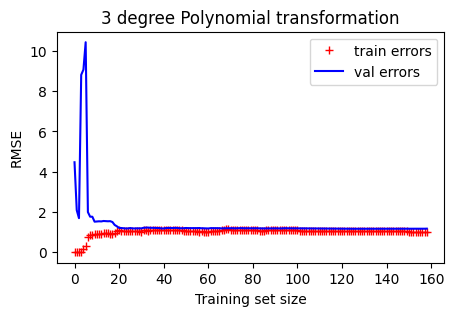

In [27]:
poly_3_reg = Pipeline([
        ("poly_3_features", PolynomialFeatures(degree=3, include_bias=False)),
        ("linear_reg", LinearRegression())
])
plot_learning_curves(poly_3_reg, X, y_degree3, "3 degree Polynomial transformation")

# Regularized Linear Models  
For a linear model, regularization is typically achieved by constraining the weights of the model.  

### Ridge Regularization(L2)  
A regularization term equal to αΣi = 1n θi2 is added to the cost function.  
This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.  

In [28]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_poly_train,y_degree3_train)
y_pred_train_ridge = ridge_reg.predict(X_poly_train)
y_pred_test_ridge = ridge_reg.predict(X_poly_test)

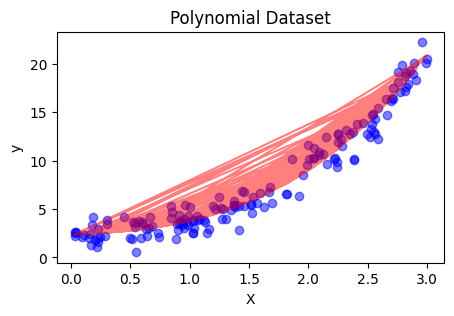

In [29]:
plt.figure(figsize=(5,3))
plt.scatter(X_train, y_degree3_train, color="b", alpha=0.5)
plt.plot(X_train, y_pred_train_ridge, color="r", alpha=0.5)
plt.title("Polynomial Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [30]:
print(f"Intercept: {ridge_reg.intercept_}")
print(f"Coefficient: {ridge_reg.coef_}")

Intercept: [2.36325445]
Coefficient: [0.45722443 0.47673282 0.47732441]


In [31]:
print(f"Ridge Regression Train accuracy: {ridge_reg.score(X_poly_train, y_degree3_train)}")
print(f"Ridge Regression Test accuracy: {ridge_reg.score(X_poly_test, y_degree3_test)}")

Ridge Regression Train accuracy: 0.9647532378420709
Ridge Regression Test accuracy: 0.9716592779842557


##### L2 regularization with SGDRegressor

In [32]:
sgd_reg_l2 = SGDRegressor(penalty="l2")
sgd_reg_l2.fit(X_poly_train, y_degree3_train)
y_pred_train_sgdl2 = sgd_reg_l2.predict(X_poly_train)
y_pred_test_sgdl2 = sgd_reg_l2.predict(X_poly_test)

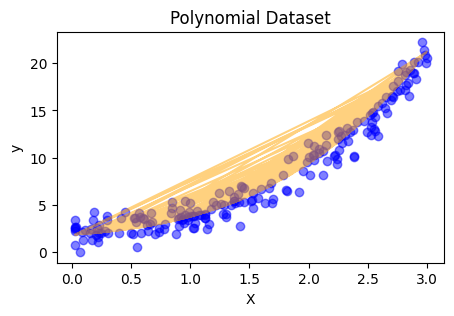

In [33]:
plt.figure(figsize=(5,3))
plt.scatter(X, y_degree3, color="b", alpha=0.5)
plt.plot(X_train, y_pred_train_sgdl2, color="orange", alpha=0.5)
plt.title("Polynomial Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [34]:
print(f"Intercept: {sgd_reg_l2.intercept_}")
print(f"Coefficient: {sgd_reg_l2.coef_}")

Intercept: [1.8136851]
Coefficient: [0.9150337  0.59708898 0.41970411]


In [35]:
print(f"SGD Regressor(l2) Train accuracy: {sgd_reg_l2.score(X_poly_train, y_degree3_train)}")
print(f"SGD Regressor(l2) Test accuracy: {sgd_reg_l2.score(X_poly_test, y_degree3_test)}")

SGD Regressor(l2) Train accuracy: 0.9612573662342314
SGD Regressor(l2) Test accuracy: 0.9712503115540597


### Lasso Regression  
Tends to completely eliminate the weights of the least important features (i.e., set them to zero).  
Automatically performs feature selection and outputs a sparse model  

In [36]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_poly_train,y_degree3_train)
y_pred_train_lasso = lasso_reg.predict(X_poly_train)
y_pred_test_lasso = lasso_reg.predict(X_poly_test)

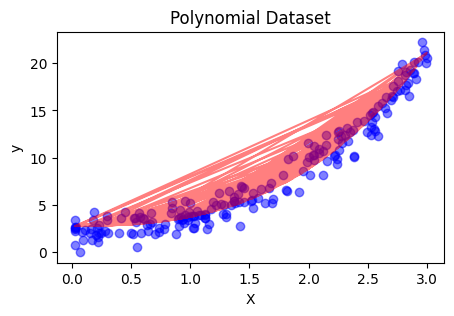

In [37]:
plt.figure(figsize=(5,3))
plt.scatter(X, y_degree3, color="b", alpha=0.5)
plt.plot(X_train, y_pred_train_lasso, color="r", alpha=0.5)
plt.title("Polynomial Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [38]:
print(f"Intercept: {lasso_reg.intercept_}")
print(f"Coefficient: {lasso_reg.coef_}")

Intercept: [2.7423058]
Coefficient: [0.         0.46826008 0.52560849]


In [39]:
print(f"Lasso Regression Train accuracy: {lasso_reg.score(X_poly_train, y_degree3_train)}")
print(f"Lasso Regression Test accuracy: {lasso_reg.score(X_poly_test, y_degree3_test)}")

Lasso Regression Train accuracy: 0.9638983682708988
Lasso Regression Test accuracy: 0.9683971785554082


##### L1 regularization with SGDRegressor

In [40]:
sgd_reg_l1 = SGDRegressor(penalty="l1")
sgd_reg_l1.fit(X_poly_train, y_degree3_train)
y_pred_train_sgdl1 = sgd_reg_l1.predict(X_poly_train)
y_pred_test_sgdl1 = sgd_reg_l1.predict(X_poly_test)

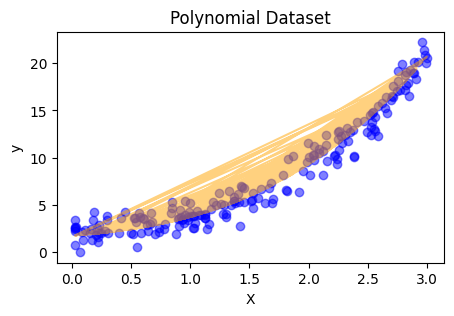

In [41]:
plt.figure(figsize=(5,3))
plt.scatter(X, y_degree3, color="b", alpha=0.5)
plt.plot(X_train, y_pred_train_sgdl1, color="orange", alpha=0.5)
plt.title("Polynomial Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [42]:
print(f"Intercept: {sgd_reg_l1.intercept_}")
print(f"Coefficient: {sgd_reg_l1.coef_}")

Intercept: [1.72478903]
Coefficient: [0.94249463 0.67170258 0.37507794]


In [43]:
print(f"SGD Regression(l1) Train accuracy: {sgd_reg_l1.score(X_poly_train, y_degree3_train)}")
print(f"SGD Regression(l1) Test accuracy: {sgd_reg_l1.score(X_poly_test, y_degree3_test)}")

SGD Regression(l1) Train accuracy: 0.9625294969419564
SGD Regression(l1) Test accuracy: 0.9728989326567687


### Elastic Net  
Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression.  

In [44]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_poly_train, y_degree3_train)
y_pred_train_elastic = elastic_net.predict(X_poly_train)
y_pred_test_elastic = elastic_net.predict(X_poly_test)

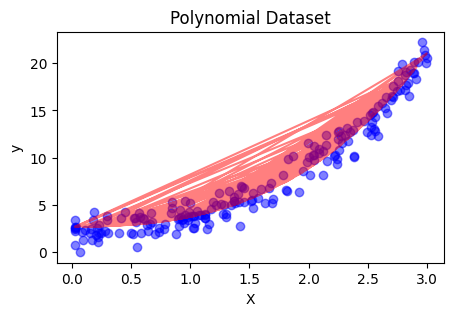

In [45]:
plt.figure(figsize=(5,3))
plt.scatter(X, y_degree3, color="b", alpha=0.5)
plt.plot(X_train, y_pred_train_elastic, color="r", alpha=0.5)
plt.title("Polynomial Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [46]:
print(f"Intercept: {elastic_net.intercept_}")
print(f"Coefficient: {elastic_net.coef_}")

Intercept: [2.68273683]
Coefficient: [0.0149508  0.53775437 0.5005061 ]


In [47]:
print(f"Elastic Net Train accuracy: {elastic_net.score(X_poly_train, y_degree3_train)}")
print(f"Elastic Net Test accuracy: {elastic_net.score(X_poly_test, y_degree3_test)}")

Elastic Net Train accuracy: 0.9642056341363001
Elastic Net Test accuracy: 0.969154141574758


# Logistic Regression(Logit Regression)  
Commonly used to estimate the probability that an instance belongs to a particular class.  
If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”).  
Model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result  
Default l2 regularization, controlled by parameter C(higher the C, lower the regularization).  
When we have multiple classes, like originally in the iris datast(0,1,2), Logistic Regression uses One vs All classification(default) i.e. it would train 3 classifiers (0 classifier, 1 classifier and 2 classifier).  

In [48]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [49]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [50]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [65]:
X = iris['data'][:, 3:] # only considering feature 'petal width (cm)'
y = (iris['target'] == 2) # only creating binary classification (if the flower is virginica or not)
X.shape, y.shape

((150, 1), (150,))

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 1), (120,), (30, 1), (30,))

In [53]:
logistic_reg = LogisticRegression(C=0.9) # when we have multiple classes, like originally in the iris datast(0,1,2), Logistic Regression uses One vs All classification
logistic_reg.fit(X_train,y_train)

LogisticRegression(C=0.9)

In [54]:
y_pred_test_probability_logistic = logistic_reg.predict_proba(X_test) # to predict_probabilities
y_pred_test_probability_logistic.shape # probability of being in each class 0, 1, 2

(30, 2)

In [55]:
y_pred_test_class_logistic = np.argmax(y_pred_test_probability_logistic, axis=1)
y_pred_test_class_logistic

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0])

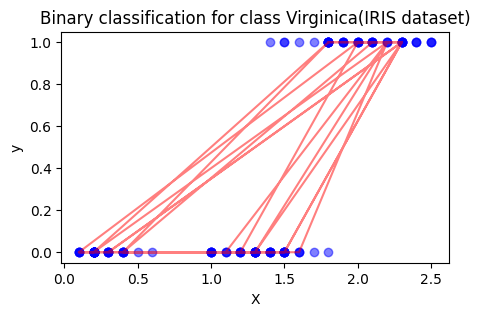

In [56]:
plt.figure(figsize=(5,3))
plt.scatter(X, y, color="b", alpha=0.5)
plt.plot(X_test, y_pred_test_class_logistic, color="r", alpha=0.5)
plt.title("Binary classification for class Virginica(IRIS dataset)")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [67]:
cross_entropy_loss = log_loss(y_test, y_pred_test_probability_logistic)
print(f"Cross entropy loss: {cross_entropy_loss}")

Cross entropy loss: 0.16418100572220298


In [57]:
print(f"Accuracy score: {accuracy_score(y_test, y_pred_test_class_logistic)}")
print(f"Precision score: {precision_score(y_test, y_pred_test_class_logistic, average='macro')}")
print(f"Recall score: {recall_score(y_test, y_pred_test_class_logistic, average='macro')}")
print(f"F1 score: {f1_score(y_test, y_pred_test_class_logistic, average='macro')}")

Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0


### Softmax Regression(Multinomial Logistic Regression)  
A generalization of Logistic Regression to support multiple classes directly.  
Computes a score $s_k(\mathbf{x})$ for each class, equation similar to Linear Regression.  
Estimates the probability of each class by applying the softmax function (normalized exponential) to the scores.  
Softmax function: $p_k = \sigma(\mathbf{s}(\mathbf{x}))k = \frac{\exp(s_k(\mathbf{x}))}{\sum{j=1}^K \exp(s_j(\mathbf{x}))}$.  
Predicts the class $k$ with the highest score/probability.  
Only used with mutually exclusive classes.  
Minimizes the cross entropy cost function.  
$J(\boldsymbol{\Theta}) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log(p_k^{(i)})$  
$y_k^{(i)}$ is 1 if instance $i$ belongs to class $k$, 0 otherwise.  

In [58]:
X = iris['data']
y = iris['target']
X.shape, y.shape

((150, 4), (150,))

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [60]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10) # C controls regularization
softmax_reg.fit(X_train,y_train)
y_pred_test_probability_softmax = softmax_reg.predict_proba(X_test)

In [61]:
y_pred_test_class_softmax = np.argmax(y_pred_test_probability_softmax, axis=1)

In [62]:
cross_entropy_loss = log_loss(y_test, y_pred_test_probability_softmax)
print(f"Cross entropy loss: {cross_entropy_loss}")

Cross entropy loss: 0.042878926602034184


In [63]:
print(f"Accuracy score: {accuracy_score(y_test, y_pred_test_class_softmax)}")
print(f"Precision score: {precision_score(y_test, y_pred_test_class_softmax, average='macro')}")
print(f"Recall score: {recall_score(y_test, y_pred_test_class_softmax, average='macro')}")
print(f"F1 score: {f1_score(y_test, y_pred_test_class_softmax, average='macro')}")

Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0
